#Problem Statement :

In a dataset consisting of 110,527 medical appointments with 14 associated variables, the primary outcome of interest is whether a patient shows up or no-shows for their appointment date that was booked. Despite receiving all the necessary instructions, a significant number of patients exhibit a no-show behavior. The challenge is to analyze the factors contributing to patient no-shows, identifying the key variables and patterns that may explain this behavior. we aim to understand the underlying reasons for patient non-compliance and ultimately find potential solutions or interventions to improve appointment attendance rates.

#Dataset Description

**Dataset Description:**

This dataset contains information related to medical appointments and patient characteristics. Each row corresponds to a unique appointment, and the columns provide details about the patient, appointment, and various attributes. Here is a description of each column:

1. **PatientId :** Identification number assigned to each patient.

2. **AppointmentID :** Identification number assigned to each appointment.

3. **Gender :** Categorical variable indicating the gender of the patient (Male or Female).

4. **ScheduledDay :** Date when someone called or registered the appointment, preceding the actual appointment.

5. **AppointmentDay :** Date of the actual appointment when the patient is scheduled to visit the doctor.

6. **Age :** Numeric variable representing the age of the patient.

7. **Neighbourhood :** Location where the appointment takes place, indicating the neighborhood.

8. **Scholarship :** Binary variable indicating whether the patient is a recipient of a scholarship (1-True and 0-False).

9. **Hipertension :** Binary variable indicating whether the patient has hypertension (1-True and 0-False).

10. **Diabetes :** Binary variable indicating whether the patient has diabetes (1-True and 0-False).

11. **Alcoholism :** Binary variable indicating whether the patient has alcoholism (1-True and 0-False).

12. **Handcap :** Variable indicating whether the patient has a handicap.

13. **SMS_received :** Binary variable indicating whether the patient has recieved message or not (1-True and 0-False).

14. **No-show :** Binary variable indicating whether the patient attended the appointment (No) or did not show up (Yes).

#Importing the necessary libraries

In [97]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score,make_scorer,roc_auc_score

import pickle

#Importing the dataset

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Patient no show.csv')

df = data.copy()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- - -

- - -

#Exploring the raw data

In [3]:
#Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#Check for duplicated entries

df.duplicated().sum()

0

In [5]:
#Data types of data

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
#Data size

print('Dataset contains {0} rows and {1} columns'.format(df.shape[0], df.shape[1]))

Dataset contains 110527 rows and 14 columns


In [7]:
#Number of unique values

df.nunique()

PatientId           6101
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
#Dataset numeric values description

df.drop(['PatientId', 'AppointmentID'], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,110527.0,37.088874,23.110205,-1.0,18.0,37.0,55.0,115.0
Scholarship,110527.0,0.098266,0.297675,0.0,0.0,0.0,0.0,1.0
Hipertension,110527.0,0.197246,0.397921,0.0,0.0,0.0,0.0,1.0
Diabetes,110527.0,0.071865,0.258265,0.0,0.0,0.0,0.0,1.0
Alcoholism,110527.0,0.030400,0.171686,0.0,0.0,0.0,0.0,1.0
Handcap,110527.0,0.022248,0.161543,0.0,0.0,0.0,0.0,4.0
SMS_received,110527.0,0.321026,0.466873,0.0,0.0,0.0,1.0,1.0


In [9]:
#checking Handcap column since it seems to have anomalies

print('Number of unique values in Handcap column : ', df['Handcap'].nunique(),'\n')
print('Value count of unique values in Handcap column : \n', df['Handcap'].value_counts())

Number of unique values in Handcap column :  5 

Value count of unique values in Handcap column : 
 0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


In [10]:
#Dataset categorical values description

df.drop(['ScheduledDay', 'AppointmentDay'], axis = 1).describe(include='object').T

,count,unique,top,freq
Gender,110527,2,F,71840
Neighbourhood,110527,81,JARDIM CAMBURI,7717
No-show,110527,2,No,88208


In [11]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

- - -

#Summary

1. **PatientId :** Consists of 6101 unique patient identification numbers, representing individual patients.

2. **AppointmentId :** Each appointment is assigned a unique identification number, matching the number of rows in the dataframe.

3. **Gender :** Two unique values ('M' and 'F'), with a higher count of females. Out of 110527 patients, 71840 are female.

4. **ScheduledDay :** Contains 103549 unique values. Values are in Zulu date-time notation with varying times, so conversion to datetime is necessary to gain useful insights and to get the actual unique dates.

5. **AppointmentDay :** Encompasses 27 unique dates for appointments; conversion to datetime is necessary. Values are in Zulu date-time notation with varying dates and a constant time for all appointment dates. Time extraction is unnecessary due to its constancy.

6. **Age :** The Age column reveals a potential anomaly with a negative age, warranting further investigation. Despite a broad age range, the symmetrical distribution (mean ≈ median) suggests normalcy. However, the presence of a maximum age of 115 raises concerns about potential outliers in the upper age range, necessitating careful examination and validation.

7. **Neighbourhood :** Appointments are across 81 distinct neighborhoods, indicating geographical diversity. "JARDIM CAMBURI" emerges as the most frequent neighborhood, suggesting a high volume of medical appointments in this specific area.

8. **Scholarship :** Binary values (0 or 1), with a mean of 0.0983. Proportion of patients with a scholarship is 9.83%, indicating a relatively low prevalence.

9. **Hipertension :** Binary values (0 or 1), with a mean of 0.1972. About 19.72% of patients have hypertension, demonstrating a notable presence.

10. **Diabetes :** Binary values (0 or 1), with a mean of 0.0719. Approximately 7.19% of patients have diabetes, representing a smaller subgroup.

11. **Alcoholism :** Binary values (0 or 1), with a mean of 0.0304. The prevalence of alcoholism is 3.04%, indicating a relatively low occurrence.


12. **Handcap :** The "Handcap" column contains five unique values, with the majority (108,286) indicating no reported handicap (Handcap value of 0). Smaller counts for values 2, 3, and 4 suggest potential representations of different disability degrees or anomalies, requiring further clarification.

13. **SMS_received :** Binary values (0 or 1), with a mean of 0.3210. Around 32.10% of patients received SMS reminders for their appointments.

14. **No-show :** The majority of patients (88,208) have a "No" value, indicating that they did show up for their scheduled appointments.The prevalence of "No" values implies a high rate of appointment attendance, suggesting that a significant portion of patients honored their scheduled appointments.

**Point to Note:** The Data is imbalanced on the basis of value counts No-show feature.


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

#Data Quality Assessment and Cleaning

Missing values Examination

In [12]:
#Percentage and number of missing values

def missing(df):
  missing_number = df.isnull().sum().sort_values(ascending = False)
  missing_percentage = (df.isnull().mean() * 100).sort_values(ascending = False)
  output = pd.concat([missing_number, missing_percentage], axis = 1, keys = ['Missing Count', 'Missing Percentage'])
  styled_output = output.style.background_gradient(subset = ['Missing Count', 'Missing Percentage'], cmap = 'Reds' )
  return styled_output

missing(df)

,Missing Count,Missing Percentage
PatientId,0,0.000000
AppointmentID,0,0.000000
Gender,0,0.000000
ScheduledDay,0,0.000000
AppointmentDay,0,0.000000
Age,0,0.000000
Neighbourhood,0,0.000000
Scholarship,0,0.000000
Hipertension,0,0.000000
Diabetes,0,0.000000


There are no missing values in the dataframe, so there is no need to worry about that.

- - -

Cleaning the values in Handcap column

In [13]:
#Replacing Handcap values of 2, 3, 4 to 1

df['Handcap'].replace([2, 3, 4], 1, inplace=True)

As per our previous summary, the "Handcap" column contains five unique values, with the majority (108,286) indicating no reported handicap (Handcap value of 0). Smaller counts for values 2, 3, and 4 suggest potential representations of different disability degrees or anomalies, requiring further clarification. Considering the lower counts for 2, 3, and 4, I have standardized them to 1 for simplicity and consistency.

- - -

In [14]:
#Creating a function of visualizing outliers using box and distribution plots

def plot_hist_box(data, column):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 4))
    sns.histplot(data = data, x = column, bins = 20, kde = True, ax = ax1, color = '#FBE7A3', edgecolor='k')
    sns.boxplot(data = data, x = column, ax = ax2, color = '#3498db')
    ax1.set_title(f"Histogram and Box Plot of {column}", size = 15, weight = 'bold')
    ax1.set_xlabel(column, size = 12, weight = 'bold')
    ax1.set_ylabel("Frequency", size = 12, weight = 'bold')
    ax2.set_xlabel(column, size = 12, weight = 'bold')
    ax2.set_ylabel("Value", size = 12, weight = 'bold')
    plt.show()

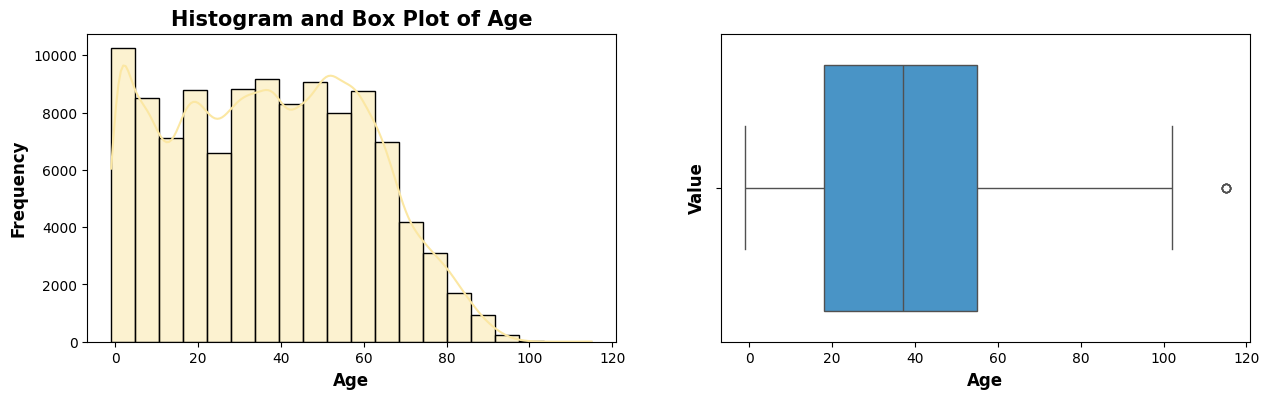

In [15]:
plot_hist_box(df, 'Age')

Let us assume for an age column, the upper bound (maximum) should be 100, and the lower bound (minimum) should be 0.

In [16]:
#Patients with Age greater than 100

df[df['Age']>100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.760000e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.200000e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.200000e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.200000e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.200000e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.340000e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.480000e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,S?O JOS?,0,1,0,0,0,1,No


In [17]:
#Patients with Age less than 0

df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.660000e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROM?O,0,0,0,0,0,0,No


In [18]:
# Dropping rows with negative ages

df = df[df['Age'] >= 0]

In [19]:
# Using lambda function to clip ages under 100

df.loc[:, 'Age'] = df['Age'].apply(lambda x: min(100, x))

<ipython-input-19-d502a5a4a801>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Age'] = df['Age'].apply(lambda x: min(100, x))


In the data cleaning process, instances with age values below 0 were dropped, and those exceeding 100 were clipped to 100. This ensures the removal of potential anomalies, such as the data point with age -1, and aligns the age distribution with realistic bounds for the analysis

- - -

In [20]:
#checking for duplicates, specifically to understand the pattern of patients scheduling multiple appointments under similar circumstances.

dum_df = df.drop('AppointmentID', axis = 1)
print('Duplicated entries after dropping AppointmentID alone :',dum_df.duplicated().sum())

Duplicated entries after dropping AppointmentID alone : 618


In [21]:
dum_df = df.drop(['AppointmentID', 'No-show'], axis = 1)
print('Duplicated entries after dropping AppointmentID and No-Show column :',dum_df.duplicated().sum())

Duplicated entries after dropping AppointmentID and No-Show column : 632


Dropping the 'AppointmentID' column alone identifies 618 duplicates, indicating that 309 patients have booked two appointments on the same day and at the same time of registration — either showing up for both appointments or not showing up for both.

When both the 'AppointmentID' and 'No-show' columns are dropped, an additional 14 duplicates are observed, implying that 7 patients have booked two appointments under similar conditions but may have missed one of them.

This observation suggests that patients, possibly due to extended waiting or consultation times, may choose to attend only one of the booked appointments.

- - -

- - -

#Feature Engineering Data Preprocessing

Creating features like month day from date

In [22]:
#Converting 'ScheduledDay' and 'AppointmentDay' to pandas datetime

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [23]:
#Creating Date_of_Reg (Date of Registration Column) and Date_of_App (Date of appointment) with Date alone
#Similarly we are creating month, day, and week number feature for each column

df['Date_of_Reg'] = df['ScheduledDay'].dt.date
df['Date_of_App'] = df['AppointmentDay'].dt.date

df['Month_of_Reg'] = df['ScheduledDay'].dt.month
df['Month_of_App'] = df['AppointmentDay'].dt.month

df['Day_of_Reg'] = df['ScheduledDay'].dt.dayofweek #where Monday is 0 and Sunday is 6
df['Day_of_App'] = df['AppointmentDay'].dt.dayofweek

In [24]:
#Number of days and month difference between Date of registration and Date of appointment

df['Diff_in_Date'] = (df['Date_of_App'] - df['Date_of_Reg']).dt.days.astype(int)
df['Diff_in_Month'] = df['Month_of_App'] - df['Month_of_Reg']

- - -

Extracting the popularity score for each neighborhood, considering both the count of appointments and the Show up rates.

In [25]:
#Creating popularity score for each neighborhood

dum_df = df.copy()
dum_df['No-show'] = dum_df['No-show'].replace({'Yes': 1, 'No': 0})

# Group by 'Neighbourhood' and calculate the count and mean
city_stats = dum_df.groupby('Neighbourhood').agg({'AppointmentID': 'count', 'No-show': 'mean'}).reset_index()
city_stats.columns = ['Neighbourhood', 'AppointmentCount', 'NoShowMean']

# Normalize scores
city_stats['Appointment_Score'] = city_stats['AppointmentCount'] / city_stats['AppointmentCount'].max()
city_stats['ShowUp_Score'] = 1 - (city_stats['NoShowMean'] / city_stats['NoShowMean'].max())

# Calculate Popularity Score
appointment_weight = 0.7
show_up_weight = 0.3

city_stats['Popularity_Score'] = (appointment_weight * city_stats['Appointment_Score']) + (show_up_weight * city_stats['ShowUp_Score'])

#Exporting it to csv file
city_stats.to_csv('/content/drive/MyDrive/Dataset/PatientNoShow/city_stats.csv', index=False)

In [26]:
#Merge the popularity scores into the original DataFrame

df = pd.merge(df, city_stats[['Neighbourhood', 'Popularity_Score']], on='Neighbourhood', how='left')

- - -

Extracting preferred day for each patient based on their historical appointment data with highest attendance

In [27]:
#Create preferred day for each patient

dum_df = df.copy()

#Categorize appointments as 'Show' or 'No-show'
dum_df['Appointment_Status'] = dum_df['No-show'].apply(lambda x: 'Show' if x == 'No' else 'No-show')

#Group by 'PatientId', 'Day_of_App', and 'Appointment_Status' to calculate counts
patient_day_counts = dum_df.groupby(['PatientId', 'Day_of_App', 'Appointment_Status']).size().reset_index(name='Count')

# Pivot the table to have 'Show' and 'No-show' as columns
patient_day_pivot = patient_day_counts.pivot_table(index=['PatientId', 'Day_of_App'], columns='Appointment_Status', values='Count', fill_value=0).reset_index()

#Identify preferred day for each patient
preferred_day = patient_day_pivot.groupby('PatientId').apply(lambda group: group.loc[group['Show'].idxmax()]['Day_of_App']).reset_index(name='Preferred_Day')

#Exporting it to csv file
preferred_day.to_csv('/content/drive/MyDrive/Dataset/PatientNoShow/preferred_day.csv', index=False)

In [28]:
#Merge the preferred day into the original DataFrame

df = pd.merge(df, preferred_day, on='PatientId', how='left')

- - -

In [29]:
#Taking a copy of the dataframe

viz_df = df.copy()

In [30]:
viz_df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Date_of_Reg,Date_of_App,Month_of_Reg,Month_of_App,Day_of_Reg,Day_of_App,Diff_in_Date,Diff_in_Month,Popularity_Score,Preferred_Day
0,2.990000e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,4,4,4,4,0,0,0.602852,1.0
1,5.590000e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,4,4,4,4,0,0,0.602852,1.0


- - -

In [31]:
#Saving a copy of cleaned df

df.to_csv('/content/drive/MyDrive/Dataset/PatientNoShow/cleaned.csv', index=False)

- - -

Encoding categorical variables to numeric

In [32]:
#Encoding using map function

df['No-show'] = df['No-show'].map({'Yes' : 1, 'No' : 0})
df['Gender'] = df['Gender'].map({'M' : 1, 'F' : 0})

- - -

#Examining and Visualizing the data

In [33]:
#User defined function for visualizing Categorical entries

def catplot(df, x, explode = None, figsize = (20, 5)):
  colors=['#FBE7A3', '#FFFFFF', '#AED6F1', '#82E0AA', '#D8BFD8', '#E6BE8A']
  sns.set(style='white')
  fig = plt.subplots(1,3,figsize = figsize)
  title = x + ' vs No-show'
  plt.suptitle(title)

  plt.subplot(1,3,1)
  df[x].value_counts().plot.pie(explode = explode, autopct = '%1.1f%%', textprops = {'fontsize': '7'}, startangle=90, shadow=True,
                                         wedgeprops={'edgecolor': 'black'}, colors = colors)

  plt.subplot(1,3,2)
  ax = sns.countplot(data = df, x = x, color = colors[0], edgecolor = 'k')
  ax.bar_label(ax.containers[0])

  plt.subplot(1,3,3)
  colors={'No' : '#FBE7A3', 'Yes' : '#FFFFFF'}
  ax = sns.countplot(data = df, x = x, hue = 'No-show', palette = colors, edgecolor = 'k')
  for container in ax.containers:
    ax.bar_label(container)

In [34]:
#User defined function for visualizing continuous values

def numplot(df,x,scale):
  colors=['#FBE7A3', '#FFFFFF']
  sns.set(style='whitegrid')
  fig=plt.subplots(2,1,figsize=(16,12))

  plt.subplot(2,1,1)
  ax=sns.histplot(data=df, x=x, kde=True, color=colors[0], edgecolor='k')
  ax.bar_label(ax.containers[0])
  title = x +' distribution'
  plt.title(title)

  plt.subplot(2,1,2)
  tar = x+'_group'
  Tstr = str(scale)
  tit2 = x+' vs No-show ( '+Tstr+' :1 )'
  dum_df = df.copy()
  dum_df[tar]=[int(i/scale) for i in dum_df[x]]
  colors={'No' : '#FBE7A3', 'Yes' : '#FFFFFF'}
  ax=sns.countplot(data=dum_df, x=tar, hue='No-show', palette=colors, edgecolor='k')
  for container in ax.containers:
    ax.bar_label(container)
  plt.title(tit2)

In [35]:
#User defined function to print the loan approval rate for each unique value in a specified column

def showup_rate(df, col_name):
  unique = df[col_name].unique()
  unique.sort()
  for i in unique:
    total = df[df[col_name] == i].shape[0]
    showup = df[(df[col_name] == i) & (df['No-show'] == 'No') ].shape[0]
    rate = (showup / total)*100
    print('Show up rate for "{0} : {1}" patients is {2:.2f}%'.format(col_name,i , rate))

In [36]:
#user defined function to calculate and print approval rates for different groups in continuous value column

def group_approval_rate(df, x, scale):
   print('After grouping {0} in {1} scale'.format(x, scale))
   tar = x+'_group'
   dum_df=df.copy()
   dum_df[tar]=[int(i/scale) for i in dum_df[x]]
   unique_groups = dum_df[tar].unique()
   unique_groups.sort()
   for i in unique_groups:
     total = dum_df[dum_df[tar] == i].shape[0]
     showup = dum_df[(dum_df[tar] == i) & (dum_df['No-show'] == 'No') ].shape[0]
     rate = (showup / total)*100
     print('Show up rate for "{0} : {1}" patients is {2:.2f}%'.format(tar,i , rate))

- - -

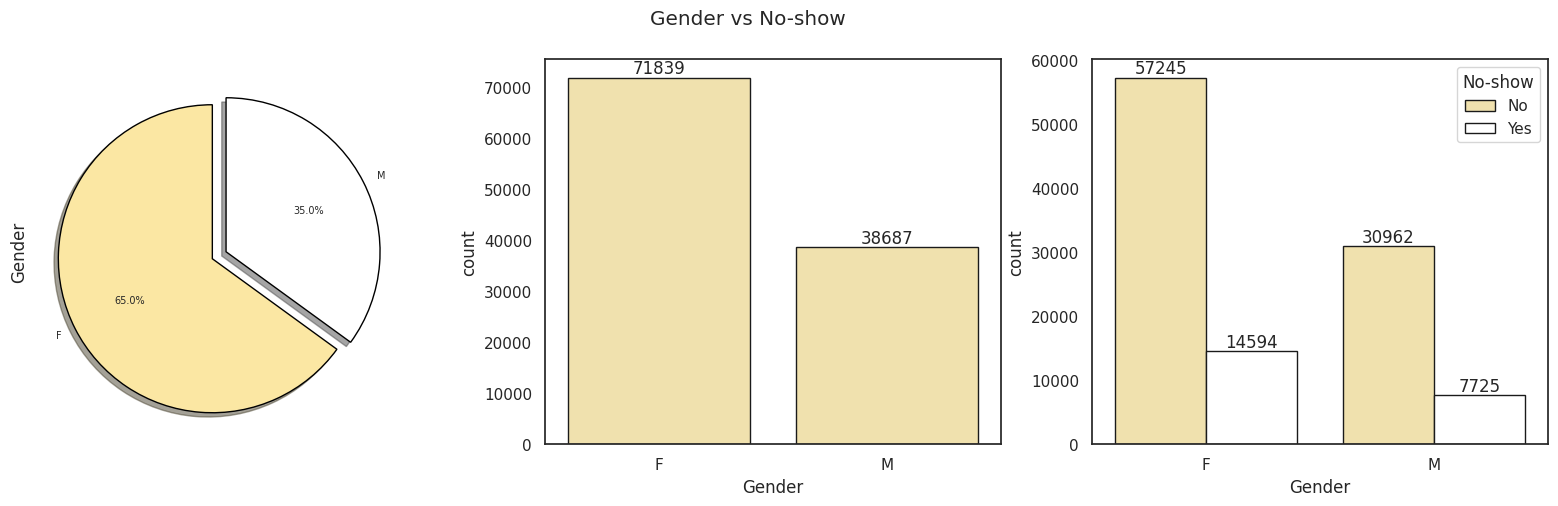

In [37]:
catplot(viz_df, 'Gender', explode = [0.1,0])

In [38]:
showup_rate(viz_df, 'Gender')

Show up rate for "Gender : F" patients is 79.69%
Show up rate for "Gender : M" patients is 80.03%


The show-up rates for male and female patients are similar, with a slight difference of less than 1%. Additionally, it is noteworthy that a significant majority of the patients in the dataset are female, outnumbering male patients.

- - -

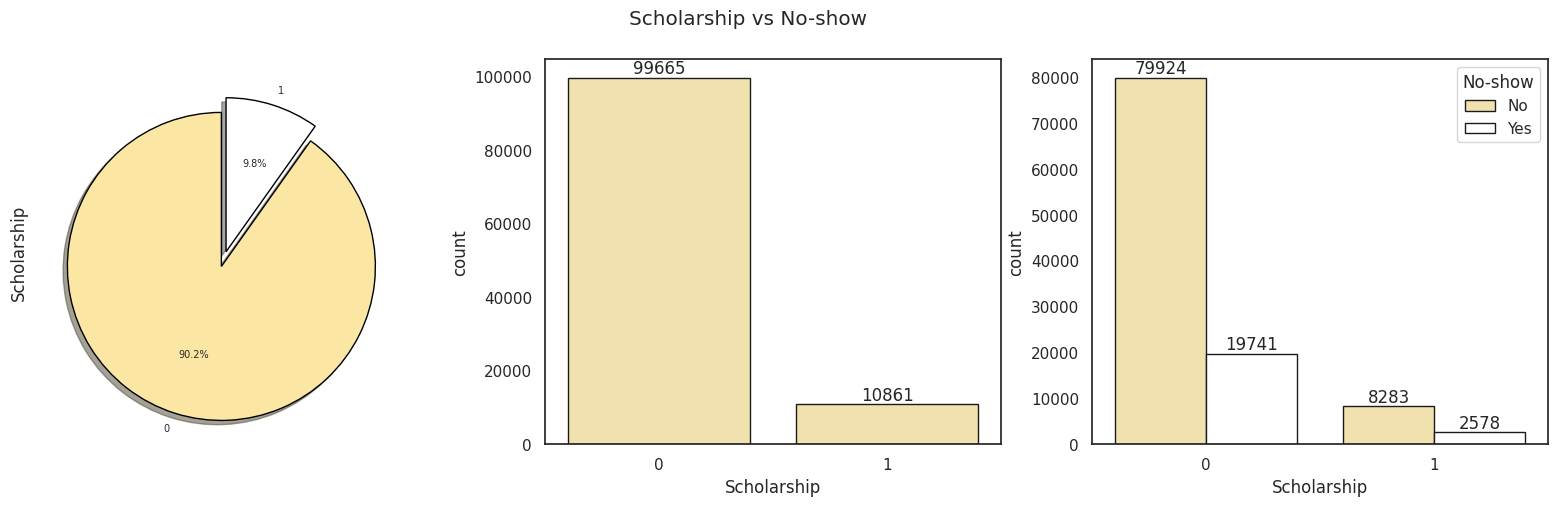

In [39]:
catplot(viz_df, 'Scholarship', explode = [0.1,0])

In [40]:
showup_rate(viz_df, 'Scholarship')

Show up rate for "Scholarship : 0" patients is 80.19%
Show up rate for "Scholarship : 1" patients is 76.26%


The show-up rate for patients without a scholarship (80.19%) is higher compared to those with a scholarship (76.26%). Among the 110,526 patients, a larger proportion (99,665) does not receive a scholarship.

- - -

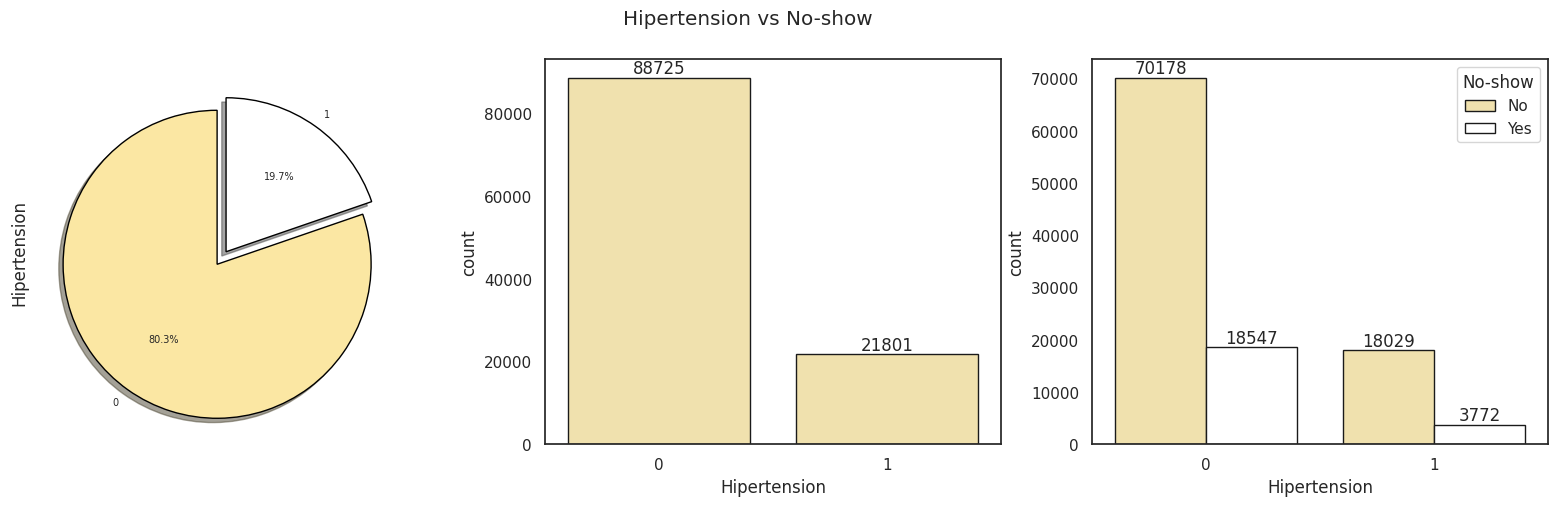

In [41]:
catplot(viz_df, 'Hipertension', explode = [0.1,0])

In [42]:
showup_rate(viz_df, 'Hipertension')

Show up rate for "Hipertension : 0" patients is 79.10%
Show up rate for "Hipertension : 1" patients is 82.70%


The show-up rate is higher for patients with hypertension (82.70%) compared to those without (79.10%), with a significant majority of 88,725 patients not having hypertension among the total 110,526 patients.

- - -

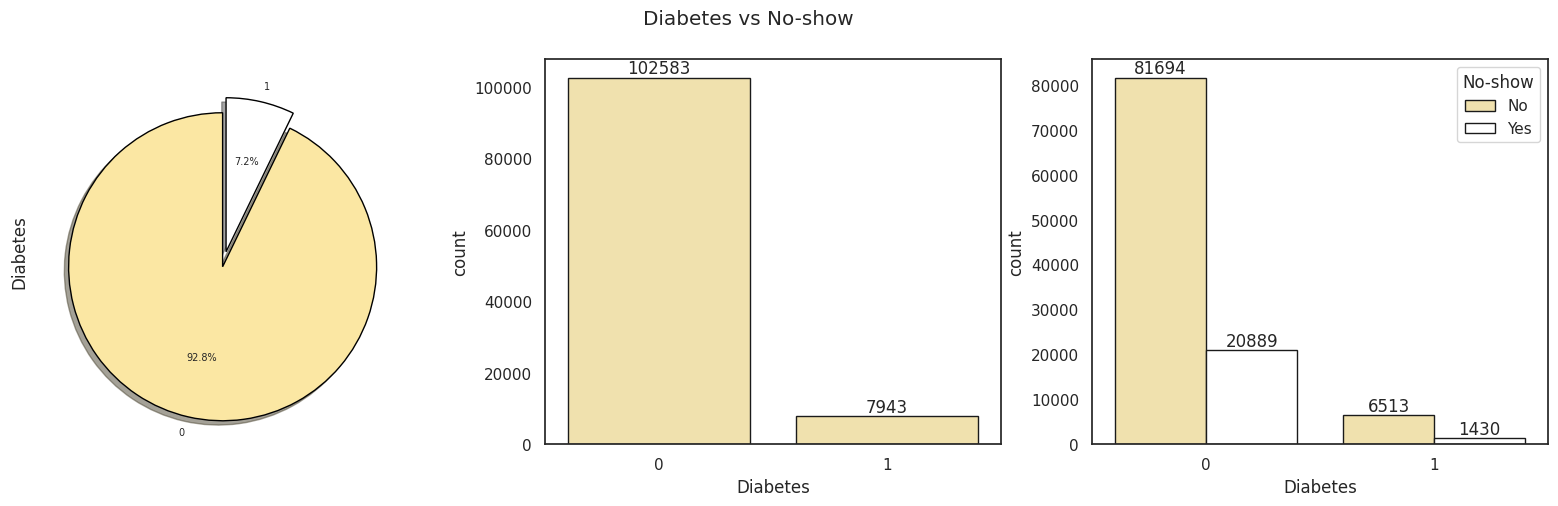

In [43]:
catplot(viz_df, 'Diabetes', explode = [0.1,0])

In [44]:
showup_rate(viz_df, 'Diabetes')

Show up rate for "Diabetes : 0" patients is 79.64%
Show up rate for "Diabetes : 1" patients is 82.00%


The show-up rate for patients without diabetes (79.64%) is slightly lower compared to those with diabetes (82.00%). Among the 110,526 patients, a majority of 102,583 do not have diabetes

- - -

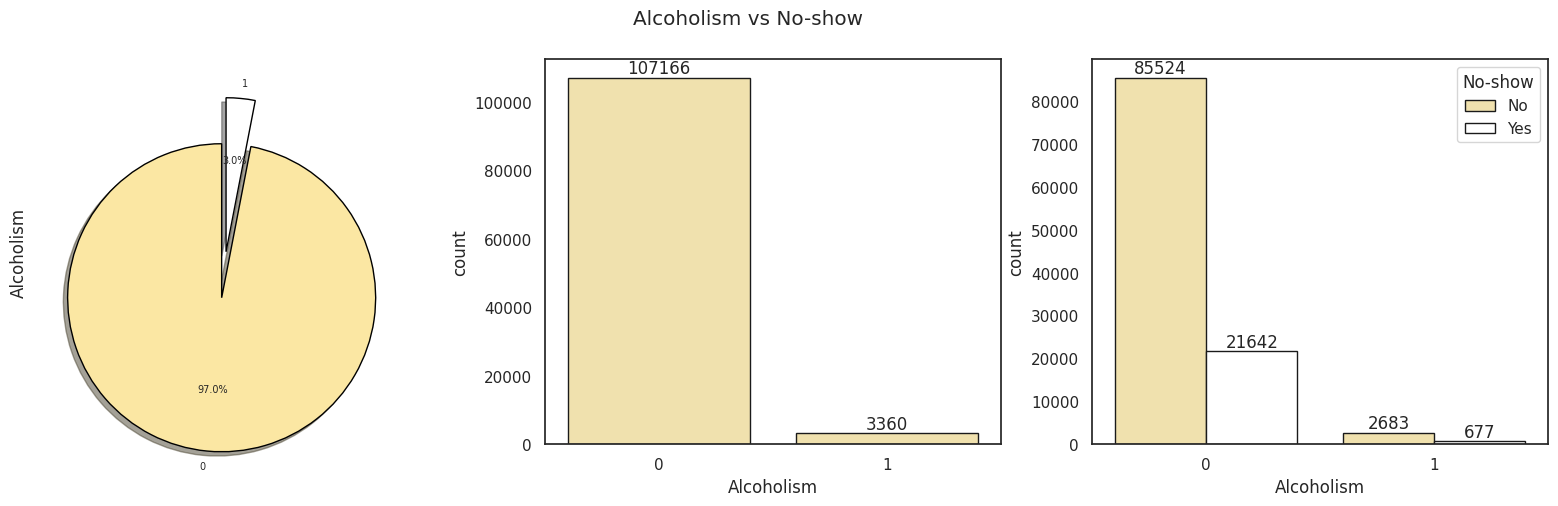

In [45]:
catplot(viz_df, 'Alcoholism', explode = [0.3,0])

In [46]:
showup_rate(viz_df, 'Alcoholism')

Show up rate for "Alcoholism : 0" patients is 79.81%
Show up rate for "Alcoholism : 1" patients is 79.85%


The show-up rates are comparable between patients with and without alcoholism (79.85% vs. 79.81%), with a predominant majority of 107,166 patients abstaining from alcohol among the total 110,526 patients.

- - -

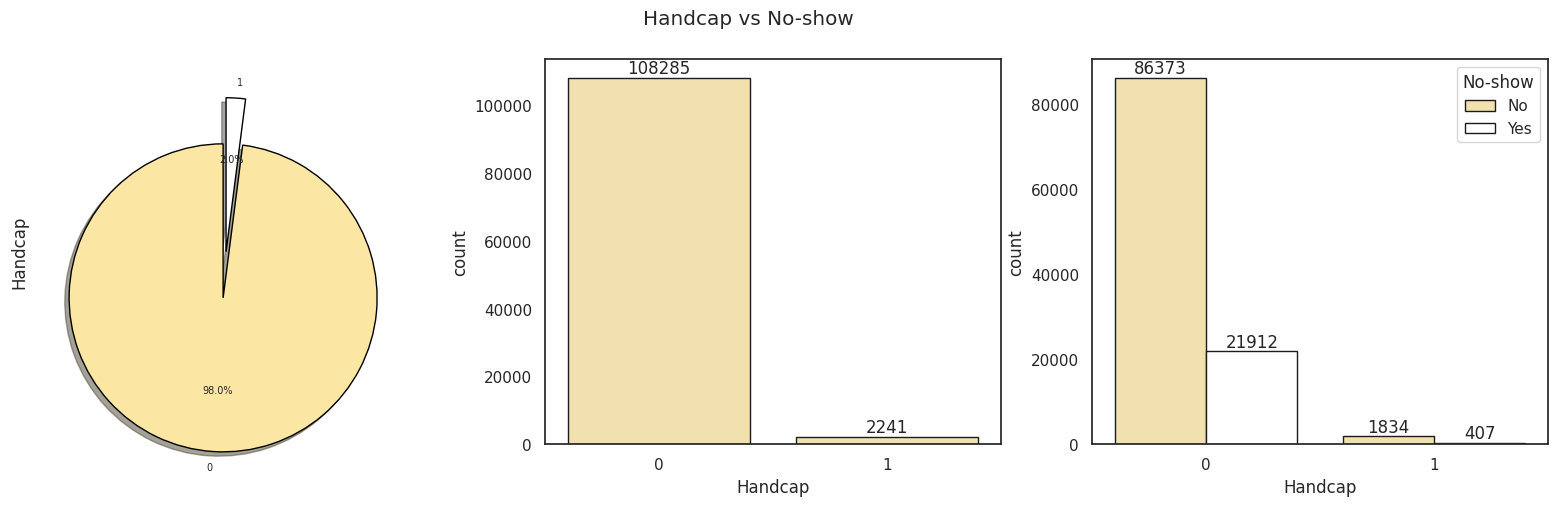

In [47]:
catplot(viz_df, 'Handcap', explode = [0.3,0])

In [48]:
showup_rate(viz_df, 'Handcap')

Show up rate for "Handcap : 0" patients is 79.76%
Show up rate for "Handcap : 1" patients is 81.84%


The show-up rate is higher for patients with handicaps (81.84%) compared to those without handicaps (79.76%), with the majority of 108,285 patients not having a handicap among the total 110,526 patients.

- - -

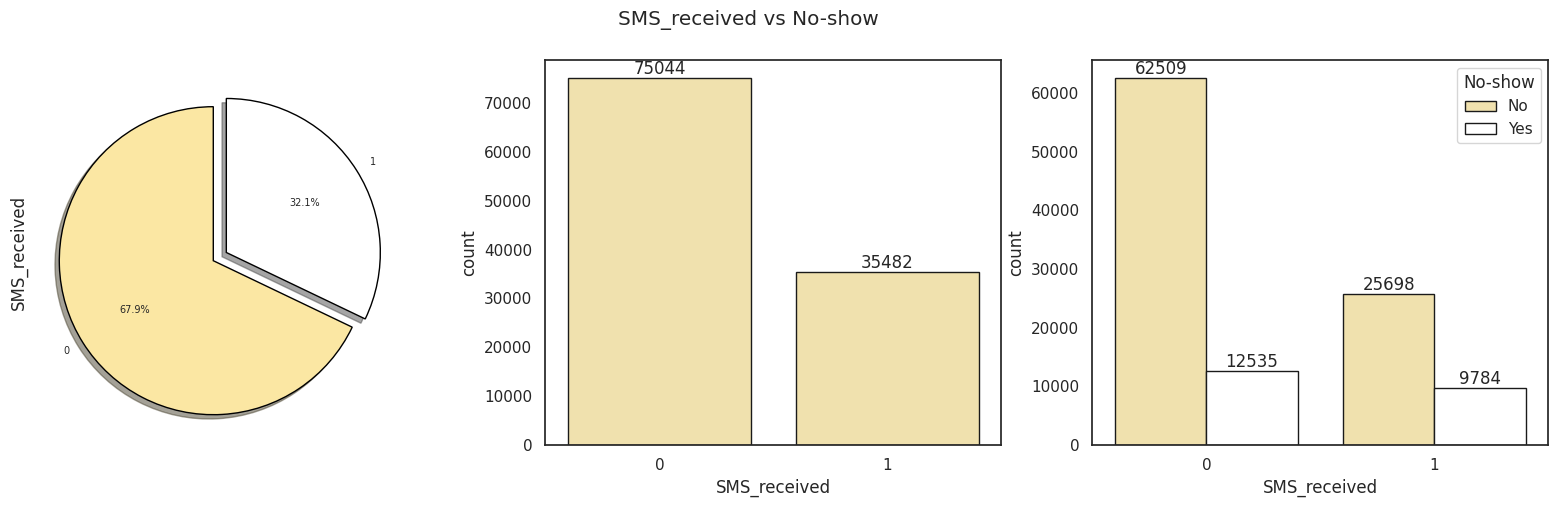

In [49]:
catplot(viz_df, 'SMS_received', explode = [0.1,0])

In [50]:
showup_rate(viz_df, 'SMS_received')

Show up rate for "SMS_received : 0" patients is 83.30%
Show up rate for "SMS_received : 1" patients is 72.43%


The show-up rate is higher for patients who did not receive an SMS (83.30%) compared to those who received an SMS (72.43%).

Notably, the majority (75,044) did not receive an SMS, while 35,482 received one. Further examination is needed to determine if the higher show-up rate for SMS recipients is influenced by factors such as the proximity between scheduling and appointment dates, potentially reducing the necessity of SMS reminders.

In [51]:
#SMS_recieved value counts where the difference in days between the registration date and appointment date is 2 or less

df[df['Diff_in_Date']<=2]['SMS_received'].value_counts()

0    50505
Name: SMS_received, dtype: int64

In [52]:
#SMS_recieved value counts where the difference in days between the registration date and appointment date is 3 or less

df[df['Diff_in_Date']<=3]['SMS_received'].value_counts()

0    52336
1      906
Name: SMS_received, dtype: int64

For appointments scheduled with a registration-to-appointment date difference of 2 days or less, no SMS reminders were sent.
Appoinments that fall under this category accounts for 31.3% of the total appointments (50,505 out of 110,526).

The majority still did not receive SMS reminders, requiring further technical clarification on the criteria for sending reminders beyond this timeframe.

- - -

In [53]:
#Getting the lower and upper bound in the Date_of_Reg

min = df['Date_of_Reg'].min()
max = df['Date_of_Reg'].max()
print(f'The Registration Date ranges between {min} and {max}')

The Registration Date ranges between 2015-11-10 and 2016-06-08


In [54]:
#Getting the lower and upper bound in the Date_of_App

min = df['Date_of_App'].min()
max = df['Date_of_App'].max()
print(f'The Appiontment Date ranges between {min} and {max}')

The Appiontment Date ranges between 2016-04-29 and 2016-06-08


The dataset spans registration dates from November 10, 2015, to June 8, 2016, and appointment dates from April 29, 2016, to June 8, 2016. This indicates that there is 2 days of April appointment data and 8 days of June Appoinment Data.

- - -

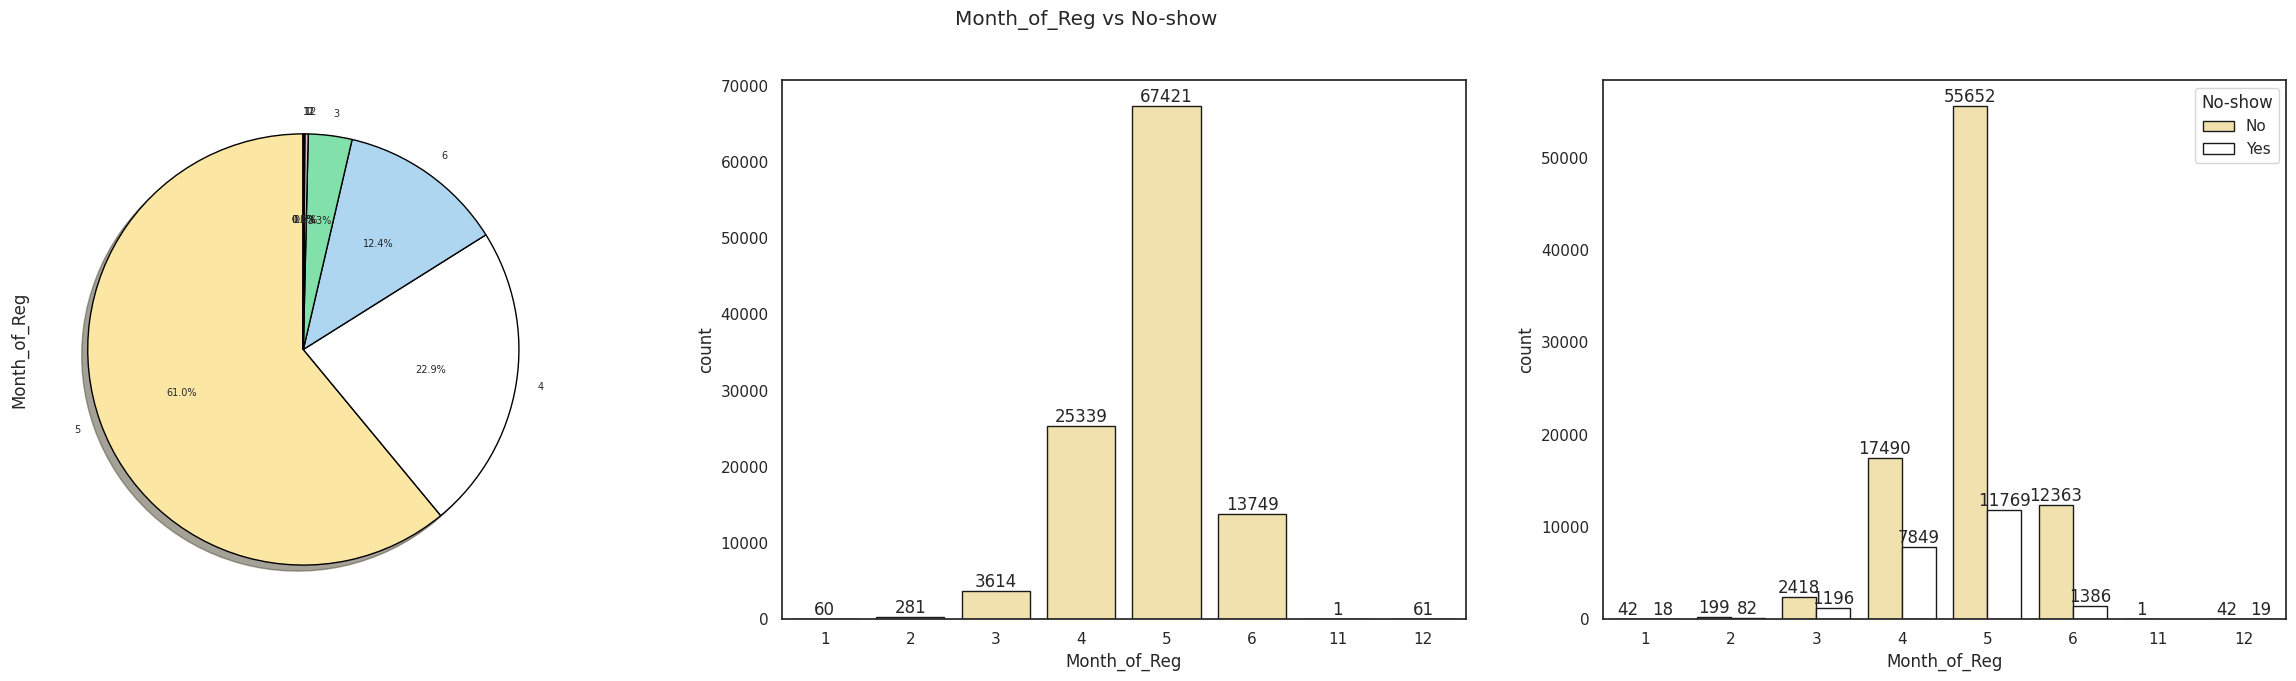

In [55]:
catplot(viz_df, 'Month_of_Reg', figsize=(30,7))

In [56]:
showup_rate(viz_df, 'Month_of_Reg')

Show up rate for "Month_of_Reg : 1" patients is 70.00%
Show up rate for "Month_of_Reg : 2" patients is 70.82%
Show up rate for "Month_of_Reg : 3" patients is 66.91%
Show up rate for "Month_of_Reg : 4" patients is 69.02%
Show up rate for "Month_of_Reg : 5" patients is 82.54%
Show up rate for "Month_of_Reg : 6" patients is 89.92%
Show up rate for "Month_of_Reg : 11" patients is 100.00%
Show up rate for "Month_of_Reg : 12" patients is 68.85%


The show-up rates vary across registration months, with the highest rates observed in months 6 (89.92%) and 5 (82.54%)

- - -

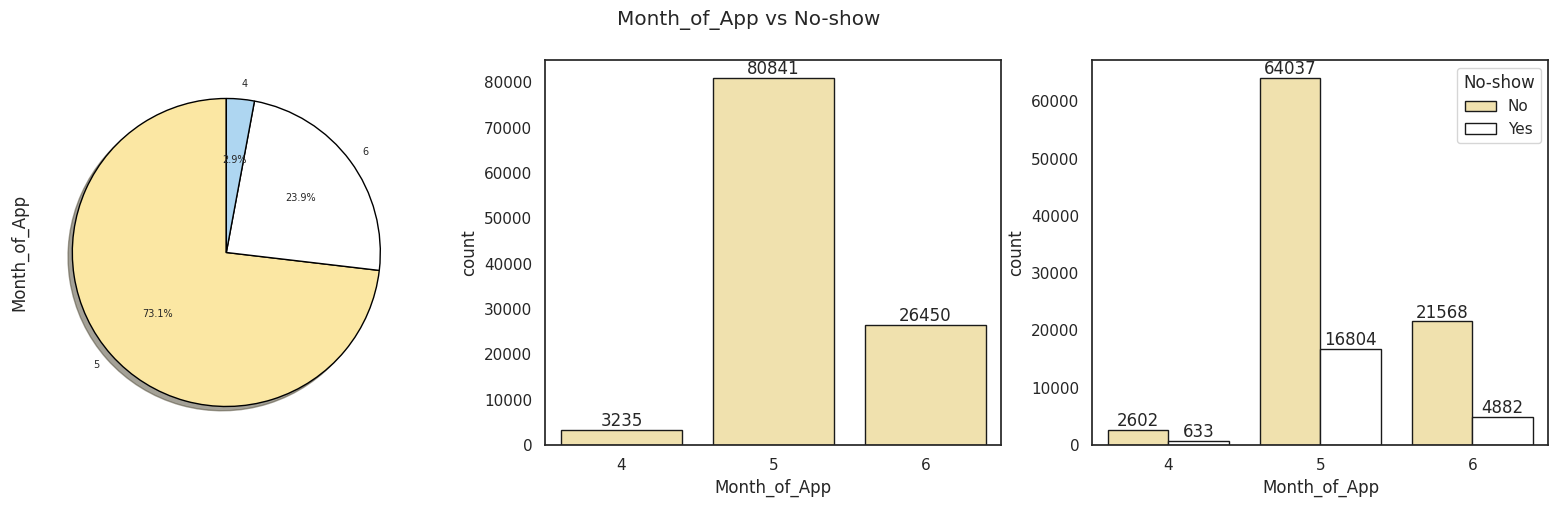

In [57]:
catplot(viz_df, 'Month_of_App')

In [58]:
showup_rate(viz_df, 'Month_of_App')

Show up rate for "Month_of_App : 4" patients is 80.43%
Show up rate for "Month_of_App : 5" patients is 79.21%
Show up rate for "Month_of_App : 6" patients is 81.54%


The show-up rates for appointment months 4 (80.43%), 5 (79.21%), and 6 (81.54%) indicate consistent attendance patterns. Notably, the dataset covers only three months of appointment data, with a majority of appointments concentrated in month 5 (80,841 appointments).

- - -

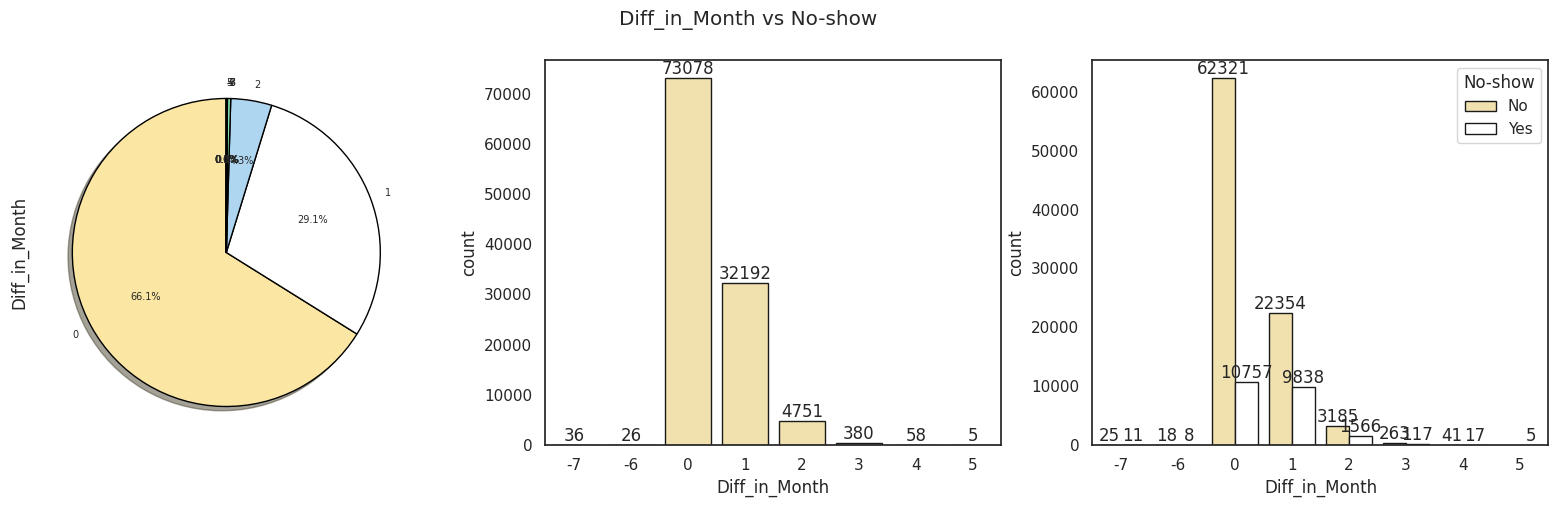

In [59]:
catplot(viz_df, 'Diff_in_Month')

In [60]:
showup_rate(viz_df, 'Diff_in_Month')

Show up rate for "Diff_in_Month : -7" patients is 69.44%
Show up rate for "Diff_in_Month : -6" patients is 69.23%
Show up rate for "Diff_in_Month : 0" patients is 85.28%
Show up rate for "Diff_in_Month : 1" patients is 69.44%
Show up rate for "Diff_in_Month : 2" patients is 67.04%
Show up rate for "Diff_in_Month : 3" patients is 69.21%
Show up rate for "Diff_in_Month : 4" patients is 70.69%
Show up rate for "Diff_in_Month : 5" patients is 0.00%


There is a trend where the show-up rate tends to decrease as the difference in months between when patients called for appointments and the actual booked appointment increases.

Note:  73,078 patients scheduling appointments in the same month have a high 85.28% show-up rate.

- - -

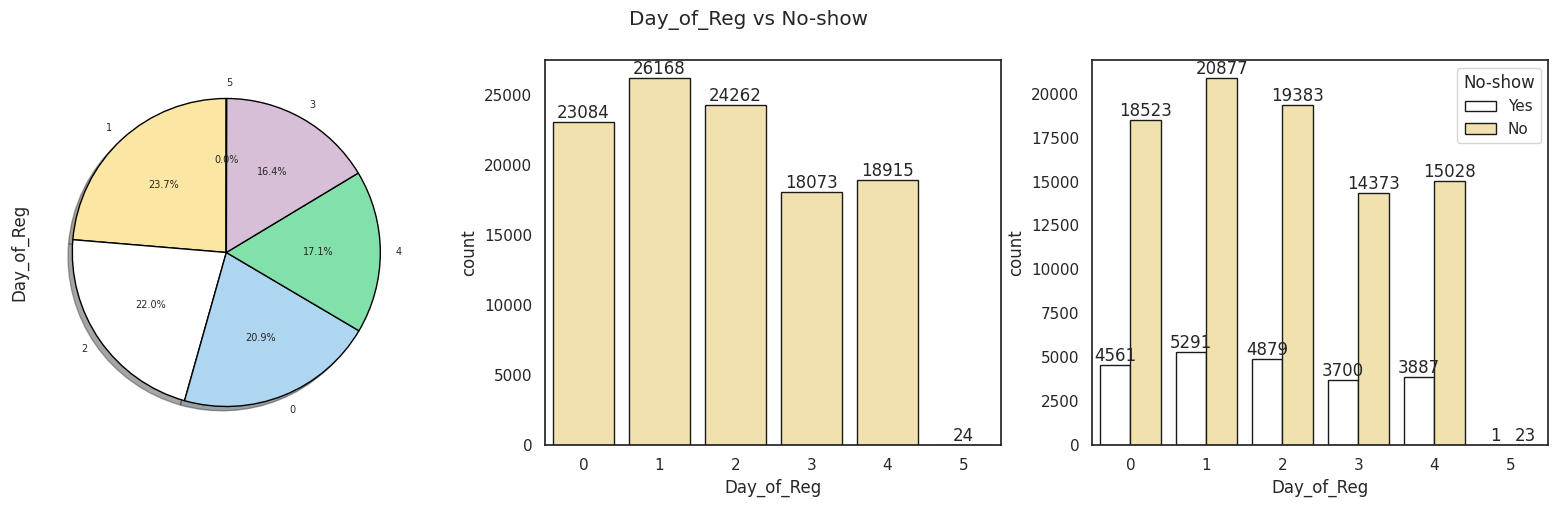

In [61]:
#Day represents the day of week starting from 0-Monday to 6-Sunday

catplot(viz_df, 'Day_of_Reg')

In [62]:
showup_rate(viz_df, 'Day_of_Reg')

Show up rate for "Day_of_Reg : 0" patients is 80.24%
Show up rate for "Day_of_Reg : 1" patients is 79.78%
Show up rate for "Day_of_Reg : 2" patients is 79.89%
Show up rate for "Day_of_Reg : 3" patients is 79.53%
Show up rate for "Day_of_Reg : 4" patients is 79.45%
Show up rate for "Day_of_Reg : 5" patients is 95.83%


The dataset indicates that the majority of patients schedule appointments from Monday to Wednesday, with slightly lower numbers on Thursday and Friday. Saturday shows the lowest count (24), suggesting a perception that it may be considered a holiday.

- - -

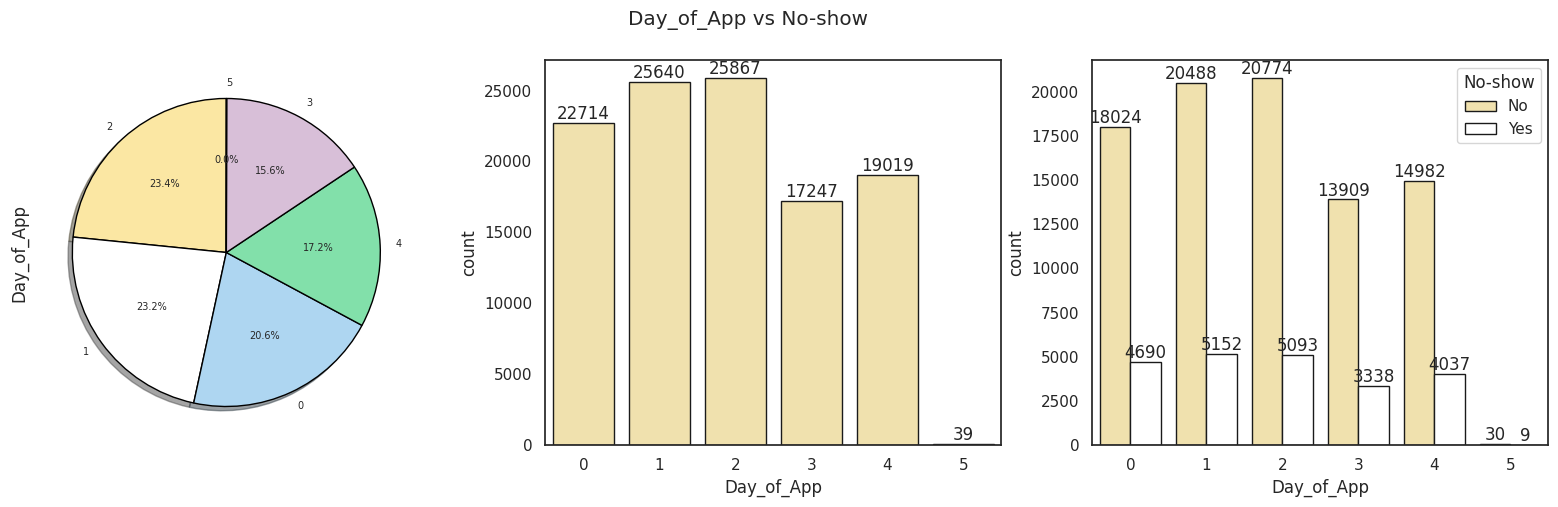

In [63]:
#Day represents the day of week starting from 0-Monday to 6-Sunday

catplot(viz_df, 'Day_of_App')

In [64]:
showup_rate(viz_df, 'Day_of_App')

Show up rate for "Day_of_App : 0" patients is 79.35%
Show up rate for "Day_of_App : 1" patients is 79.91%
Show up rate for "Day_of_App : 2" patients is 80.31%
Show up rate for "Day_of_App : 3" patients is 80.65%
Show up rate for "Day_of_App : 4" patients is 78.77%
Show up rate for "Day_of_App : 5" patients is 76.92%


Appointments are predominantly booked and attended from Monday to Wednesday, with a decline towards the end of the week. Notably, Saturday appointments exhibit a significantly lower count (39), prompting further investigation into the reasons behind the weekend scheduling and attendance pattern.

- - -

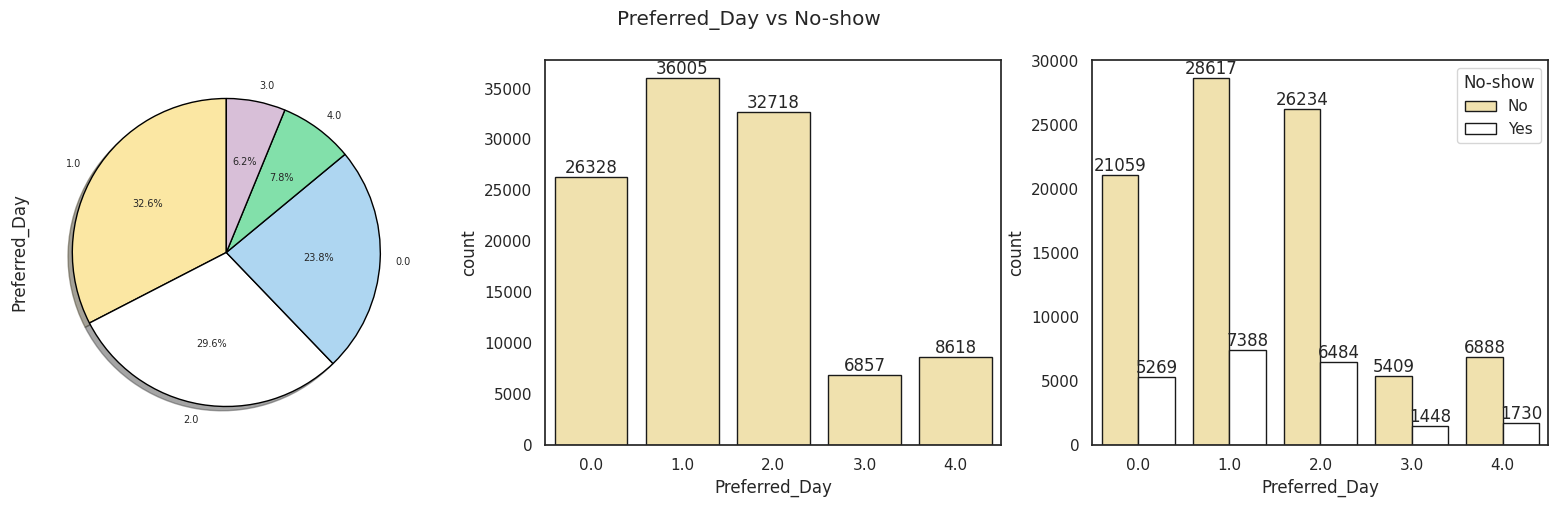

In [65]:
#Day represents the day of week starting from 0-Monday to 6-Sunday

catplot(viz_df, 'Preferred_Day')

In [66]:
showup_rate(viz_df, 'Preferred_Day')

Show up rate for "Preferred_Day : 0.0" patients is 79.99%
Show up rate for "Preferred_Day : 1.0" patients is 79.48%
Show up rate for "Preferred_Day : 2.0" patients is 80.18%
Show up rate for "Preferred_Day : 3.0" patients is 78.88%
Show up rate for "Preferred_Day : 4.0" patients is 79.93%


Tuesday emerges as the most preferred day for appointments among patients, with the highest count, followed by Wednesday and Monday. The show-up rates are relatively consistent across preferred days.

Notably, Thursday and Friday exhibit lower preference.

- - -

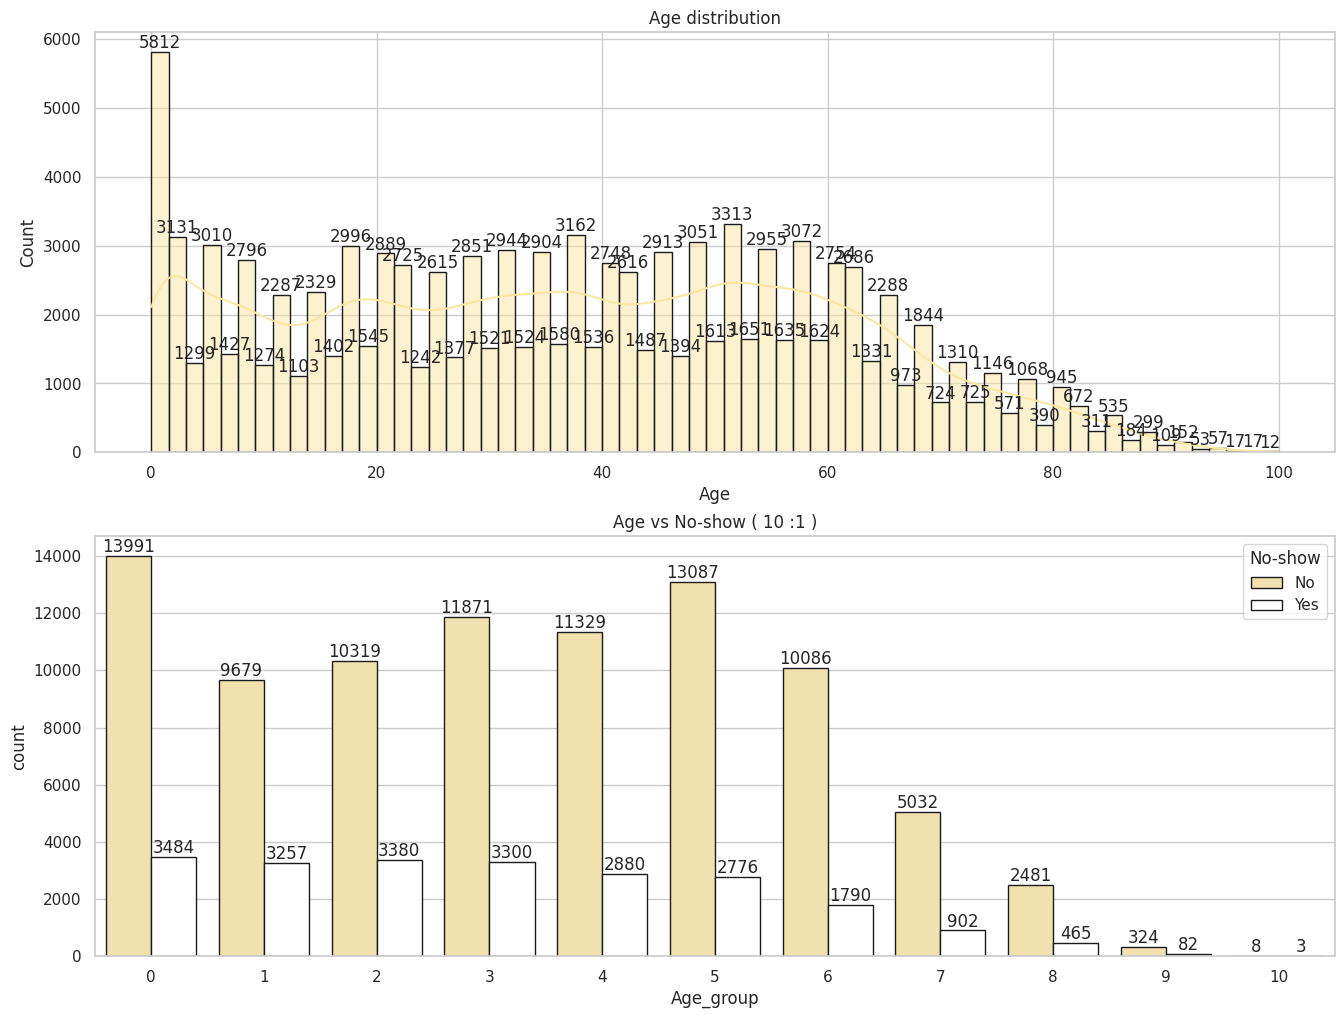

In [67]:
numplot(viz_df, 'Age', 10)

In [68]:
group_approval_rate(viz_df, 'Age', 10)

After grouping Age in 10 scale
Show up rate for "Age_group : 0" patients is 80.06%
Show up rate for "Age_group : 1" patients is 74.82%
Show up rate for "Age_group : 2" patients is 75.33%
Show up rate for "Age_group : 3" patients is 78.25%
Show up rate for "Age_group : 4" patients is 79.73%
Show up rate for "Age_group : 5" patients is 82.50%
Show up rate for "Age_group : 6" patients is 84.93%
Show up rate for "Age_group : 7" patients is 84.80%
Show up rate for "Age_group : 8" patients is 84.22%
Show up rate for "Age_group : 9" patients is 79.80%
Show up rate for "Age_group : 10" patients is 72.73%


In [69]:
group_approval_rate(viz_df, 'Age', 5)

After grouping Age in 5 scale
Show up rate for "Age_group : 0" patients is 81.79%
Show up rate for "Age_group : 1" patients is 77.62%
Show up rate for "Age_group : 2" patients is 75.06%
Show up rate for "Age_group : 3" patients is 74.63%
Show up rate for "Age_group : 4" patients is 74.84%
Show up rate for "Age_group : 5" patients is 75.81%
Show up rate for "Age_group : 6" patients is 77.51%
Show up rate for "Age_group : 7" patients is 78.97%
Show up rate for "Age_group : 8" patients is 78.02%
Show up rate for "Age_group : 9" patients is 81.33%
Show up rate for "Age_group : 10" patients is 82.02%
Show up rate for "Age_group : 11" patients is 83.01%
Show up rate for "Age_group : 12" patients is 85.10%
Show up rate for "Age_group : 13" patients is 84.70%
Show up rate for "Age_group : 14" patients is 85.09%
Show up rate for "Age_group : 15" patients is 84.42%
Show up rate for "Age_group : 16" patients is 84.13%
Show up rate for "Age_group : 17" patients is 84.38%
Show up rate for "Age_grou

The show-up rate is high (nearly 84.0%) in the age group between 60 and 90; however, the headcount in this age range is relatively low. Notably, the majority of patients belong to age group 0, highlighting a significant number of children and newborns requiring medical attention. The high show-up rate for age group 0 (81.79%) suggests the need for further analysis to understand appointment patterns and attendance, especially for newborns.

- - -

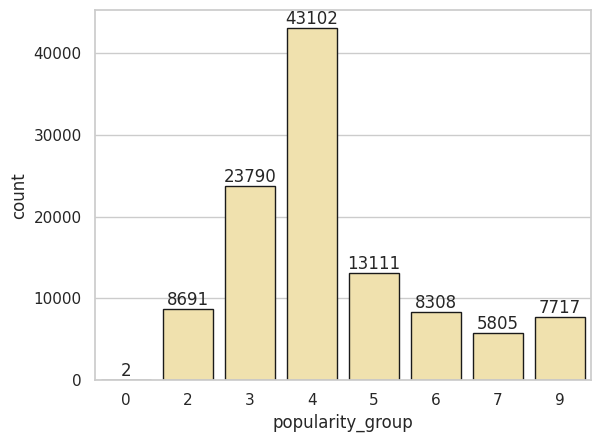

In [70]:
dum_df = df.copy()
dum_df['popularity_group']=[int(i/0.1) for i in dum_df['Popularity_Score']]
ax=sns.countplot(data=dum_df, x='popularity_group', color = '#FBE7A3', edgecolor='k')
for container in ax.containers:
   ax.bar_label(container)

In [71]:
group_approval_rate(df, 'Popularity_Score', 0.1)

After grouping Popularity_Score in 0.1 scale
Show up rate for "Popularity_Score_group : 0" patients is 0.00%
Show up rate for "Popularity_Score_group : 2" patients is 0.00%
Show up rate for "Popularity_Score_group : 3" patients is 0.00%
Show up rate for "Popularity_Score_group : 4" patients is 0.00%
Show up rate for "Popularity_Score_group : 5" patients is 0.00%
Show up rate for "Popularity_Score_group : 6" patients is 0.00%
Show up rate for "Popularity_Score_group : 7" patients is 0.00%
Show up rate for "Popularity_Score_group : 9" patients is 0.00%


Group 4 has the highest entry count (43,102), suggesting a significant number of appointments in this popularity score range. Also show up rate ranges between 79.0% to 81.5% across different popularity score group.

- - -

In [72]:
#Examining patients have same date of registration and the date of appoinment

Total = df[df['Diff_in_Date']==0].shape[0]
ShowedUp_SameDay = df[(df['Diff_in_Date']==0)&(df['No-show']==0)].shape[0]

print(f'When the Date of Registation and the date of Appoinment is same the approval rate is {round(100*ShowedUp_SameDay/Total, 2)}%')

When the Date of Registation and the date of Appoinment is same the approval rate is 95.35%


In [73]:
#Examining patients have same Month of registration and the Month of appoinment

Total = df[df['Diff_in_Month']==0].shape[0]
ShowedUp_SameMonth = df[(df['Diff_in_Month']==0)&(df['No-show']==0)].shape[0]

print(f'When the Month of Registation and the Month of Appoinment is same the approval rate is {round(100*ShowedUp_SameMonth/Total, 2)}%')

When the Month of Registation and the Month of Appoinment is same the approval rate is 85.28%


When the registration date matches the appointment date, the approval rate is 95.35%. Similarly, when the registration month aligns with the appointment month, the approval rate is 85.28%, indicating a higher show-up likelihood when registration and appointment dates or months coincide.

- - -

In [74]:
Total_patients = df['PatientId'].nunique()
Total_ShowedUp_patients = df[df['No-show']==0]['PatientId'].nunique()

print(f"{Total_patients - Total_ShowedUp_patients} patients haven't showed up for any of the appoinments")

379 patients haven't showed up for any of the appoinments


In [75]:
Total_patients = df['PatientId'].nunique()
Total_NoShow_patients = df[df['No-show']==1]['PatientId'].nunique()

print(f"{Total_patients - Total_NoShow_patients} patients have showed up for all the booked appoinments")

2166 patients have showed up for all the booked appoinments


Out of the total patients, 379 have not shown up for any appointments, while 2,166 patients have consistently attended all their booked appointments.

- - -

In [76]:
#Getting unique patient id who showed up and not showed up

no_show_patients = df[df['No-show'] == 1]['PatientId'].unique()
showed_up_patients = df[df['No-show'] == 0]['PatientId'].unique()

In [77]:
#Getting Patient id and along with dataframe who haven't showed up for any appointments

patients_NoShow_all = set(no_show_patients) - set(showed_up_patients)
df_NoShow_all = df[df['PatientId'].isin(patients_NoShow_all)]

#Exporting it to csv file
df_NoShow_all.to_csv('/content/drive/MyDrive/Dataset/PatientNoShow/Patients_NoShow_At_All.csv', index=False)

print(f"{df_NoShow_all.shape[0]} appoinments are booked by these {df_NoShow_all['PatientId'].nunique()} patient's who haven't showed up at all")

462 appoinments are booked by these 379 patient's who haven't showed up at all


In [78]:
df_NoShow_all['PatientId'].value_counts()

2.851680e+10    7
9.717348e+10    6
2.416927e+10    5
3.484576e+10    4
5.669268e+10    4
               ..
5.512466e+10    1
2.975614e+10    1
3.838558e+10    1
2.846559e+09    1
5.423193e+10    1
Name: PatientId, Length: 379, dtype: int64

The data indicates that 379 patients have collectively booked 462 appointments but have not attended any of them. The list of Patient IDs reveals multiple instances where individual patients have booked several appointments without showing up. This pattern suggests the need for further analysis to understand the underlying reasons for non-attendance despite multiple bookings.

- - -

In [79]:
#Getting Patient id and along with dataframe who have showed up for all appointments

patients_ShowUp_all = set(showed_up_patients) - set(no_show_patients)
df_ShowUp_all = df[df['PatientId'].isin(patients_ShowUp_all)]

#Exporting it to csv file
df_ShowUp_all.to_csv('/content/drive/MyDrive/Dataset/PatientNoShow/Patients_ShowUp_for_All.csv', index=False)

print(f"{df_ShowUp_all.shape[0]} appoinments are booked by these {df_ShowUp_all['PatientId'].nunique()} patient's who have showed up everytime")

4128 appoinments are booked by these 2166 patient's who have showed up everytime


In [80]:
df_ShowUp_all['PatientId'].value_counts()

8.435224e+09    51
8.850000e+11    29
1.150000e+11    27
7.640000e+14    25
6.180000e+11    25
                ..
8.947519e+09     1
8.589227e+10     1
8.368143e+10     1
1.375613e+10     1
9.481592e+10     1
Name: PatientId, Length: 2166, dtype: int64

The data reveals that 2,166 patients have consistently attended all 4,128 booked appointments. This consistency in attendance for each appointment suggests a group of patients with a high level of commitment to their scheduled medical visits. Further analysis could explore factors contributing to this reliable attendance pattern and potentially identify positive practices or incentives that encourage regular attendance.

- - -

#Inference

1. **Gender Show-up Rates:** The dataset shows comparable show-up rates between genders, with a majority of patients being female.

2. **Scholarship Impact:** Patients without a scholarship exhibit a higher show-up rate (80.19%) compared to those with a scholarship (76.26%).

3. **Health Conditions:** Patients with hypertension (82.70%) have a higher show-up rate than those without (79.10%). The show-up rate for patients without diabetes (79.64%) is slightly lower compared to those with diabetes (82.00%). The show-up rates are comparable between patients with and without alcoholism (79.85% vs. 79.81%)

4. **Handicap Influence:** Patients with handicaps show a higher show-up rate (81.84%) compared to those without handicaps (79.76%).

5. **SMS Reminder:** For appointments with a registration-to-appointment date difference of 2 days or less, 31.3% (50,505 out of 110,526) received no SMS reminders, and there is a need for clarification on the criteria for sending reminders beyond this timeframe since majority of other appoinments didn't receive SMS.

6. **Temporal Patterns:** Appointments are commonly scheduled and attended from Monday to Wednesday, with lower counts on Thursday and Friday. Saturday exhibits lower counts, suggesting potential holidays or limited availability.

7. **Preferred Appointment Day:** Tuesday is the most preferred day for appointments.

8. **Age Group Impact:** The show-up rate is high in the age group between 60 and 90, Also majority of patients belong to age group 0 (children and newborns).

9. **Popularity Score Analysis:** Popularity score group 4 has the highest entry count, indicating significant popularity, and show-up rates range between 79.0% to 81.5% across different popularity score groups.

10. **Patient Attendance Dynamics:** A subset of 379 patients collectively booked 462 appointments without attending any, requiring further investigation into the reasons for non-attendance despite multiple bookings.

11. **Consistent Attendance Group:** Conversely, the dataset reveals a group of 2,166 patients who consistently attended all 4,128 booked appointments, prompting questions about factors contributing to such reliable attendance and potential positive practices or incentives.

12. **Strong Correlation in Date Synchronization:** Notably, when registration and appointment dates or months align, the approval rates significantly spike to 95.35% and 85.28%, respectively, emphasizing a strong correlation between date synchronization and patient attendance.

- - -

- - -

#Feature Selection

In [81]:
#Getting the column names

df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Date_of_Reg', 'Date_of_App', 'Month_of_Reg', 'Month_of_App',
       'Day_of_Reg', 'Day_of_App', 'Diff_in_Date', 'Diff_in_Month',
       'Popularity_Score', 'Preferred_Day'],
      dtype='object')

<ipython-input-82-5ff8422a74f6>:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corrwith(df['No-show']).sort_values(ascending = False).to_frame()


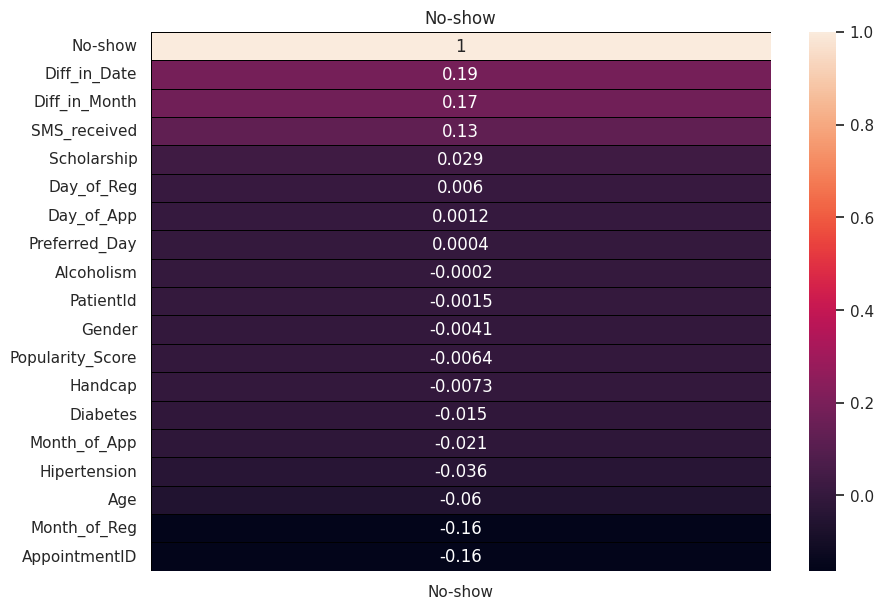

In [82]:
#visualize the correlation of independent variables with dependent variable

corr = df.corrwith(df['No-show']).sort_values(ascending = False).to_frame()
corr.columns = ['No-show']
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True, linewidths=0.4 ,linecolor='black')

plt.title('No-show')
plt.show()

In [83]:
#Selecting the dependent and independent variable

X_df = df.drop(['PatientId', 'AppointmentID', 'ScheduledDay',
       'AppointmentDay', 'Neighbourhood', 'No-show',
       'Date_of_Reg', 'Date_of_App', 'Month_of_Reg', 'Month_of_App'], axis = 1)
y = df['No-show'].values

In [84]:
X_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Day_of_Reg,Day_of_App,Diff_in_Date,Diff_in_Month,Popularity_Score,Preferred_Day
0,0,62,0,1,0,0,0,0,4,4,0,0,0.602852,1.0
1,1,56,0,0,0,0,0,0,4,4,0,0,0.602852,1.0
2,0,62,0,0,0,0,0,0,4,4,0,0,0.307174,4.0
3,0,8,0,0,0,0,0,0,4,4,0,0,0.254085,4.0
4,0,56,0,1,1,0,0,0,4,4,0,0,0.602852,0.0


In [85]:
X = X_df.values

In [86]:
#Splitting the train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state = 6)

#Handling Imbalance data

In [87]:
print("Before OverSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label 'No': {}".format(sum(y_train == 0)))


sm = SMOTE(random_state = 6)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape))

print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_resampled == 1)))
print("After OverSampling, counts of label 'No': {}".format(sum(y_train_resampled == 0)))

Before OverSampling, counts of label 'Yes': 16739
Before OverSampling, counts of label 'No': 66155
After OverSampling, the shape of train_X: (132310, 14)
After OverSampling, the shape of train_y: (132310,) 

After OverSampling, counts of label 'Yes': 66155
After OverSampling, counts of label 'No': 66155


#Model Building and Evaluation

##Multi layer perceptron

In [94]:
#Using Multi layer perceptron for model building

classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
classifier.fit(X_train_resampled, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [95]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[17624,  4428],
       [ 3307,  2273]])

In [96]:
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("precision score : ",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("f1 score : ",f1_score(y_test,y_pred))
print("\nclassification report \n")
print(classification_report(y_test,y_pred))

Accuracy score :  0.7200709322524609
precision score :  0.33920310401432624
recall score :  0.4073476702508961
f1 score :  0.37016529598566894

classification report 

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     22052
           1       0.34      0.41      0.37      5580

    accuracy                           0.72     27632
   macro avg       0.59      0.60      0.60     27632
weighted avg       0.74      0.72      0.73     27632



In [98]:
# Save the Random Forest model to a pickle file
with open('MLP1model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

##Random Forest Classifier

In [91]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_resampled, y_train_resampled)
y_pred = RandomForest.predict(X_test)

In [92]:
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("precision score : ",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("f1 score : ",f1_score(y_test,y_pred))
print("\nclassification report \n")
print(classification_report(y_test,y_pred))

Accuracy score :  0.7739939200926462
precision score :  0.3949447077409163
recall score :  0.22401433691756273
f1 score :  0.28587764436821045

classification report 

              precision    recall  f1-score   support

           0       0.82      0.91      0.87     22052
           1       0.39      0.22      0.29      5580

    accuracy                           0.77     27632
   macro avg       0.61      0.57      0.58     27632
weighted avg       0.74      0.77      0.75     27632



In [101]:
# Save the Random Forest model to a pickle file
with open('RF1model.pkl', 'wb') as file:
    pickle.dump(RandomForest, file)

#Feature Importance from the fitted algorithm

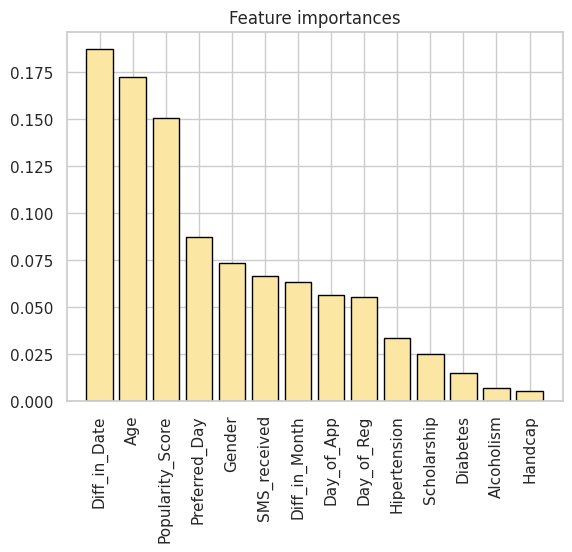

In [93]:
importances = RandomForest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="#FBE7A3", align="center", edgecolor="black")
plt.xticks(range(X_train.shape[1]), X_df.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Diff_in_Date, Age and Popularity_Score are the top 3 important features based on the model created

#Conclusion

In this project, we employed two classification models, namely the Multi-Layer Perceptron (MLP) and the Random Forest Classifier, to predict patient no-shows for medical appointments. Both models exhibited varying performance metrics, and we focused on assessing recall to correctly predict patients who did not show up. The Random Forest model exhibits a lower recall score (0.224) for predicting no-show instances (class 1) compared to the Multi-Layer Perceptron (MLP) model (0.40). While Random Forest has the higher accuracy when compared to MLP.


**Additional Note :**
The data, available only for the month of May with a few days from the previous and next months, indicates a potential seasonality or specific temporal trend in appointment scheduling. This finding implies that the current models might not be entirely generalizable across different months or seasons.